In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, zscore
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
file_path = 'dataset.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

In [3]:
# Q1: Identify Missing or Incorrect Data and Clean
# Check missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64


In [4]:
# Handle missing values for numeric columns by imputing mean values grouped by species
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    data[col] = data.groupby('species')[col].transform(lambda x: x.fillna(x.mean()))

In [5]:
# Fill missing values in 'sex' with 'Unknown'
data['sex'] = data['sex'].fillna('Unknown')

print("\nData after handling missing values:\n", data.isnull().sum())



Data after handling missing values:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [6]:
# Q2: Average body_mass_g for Gentoo penguins
gentoo_avg_body_mass = data[data['species'] == 'Gentoo']['body_mass_g'].mean()
print("\nAverage body mass for Gentoo penguins:", gentoo_avg_body_mass)



Average body mass for Gentoo penguins: 5133.739837398374


In [7]:
# Q3: Distributions of bill_length_mm and bill_depth_mm
for species in data['species'].unique():
    subset = data[data['species'] == species]
    for col in ['bill_length_mm', 'bill_depth_mm']:
        print(f"{col} for {species} - Skewness: {skew(subset[col])}, Kurtosis: {kurtosis(subset[col])}")

bill_length_mm for Adelie - Skewness: 0.16059295874573778, Kurtosis: -0.17292068498065083
bill_depth_mm for Adelie - Skewness: 0.3190901156555227, Kurtosis: -0.07858301626122444
bill_length_mm for Gentoo - Skewness: 0.6899708614688632, Kurtosis: 1.4074174886702489
bill_depth_mm for Gentoo - Skewness: 0.321562291630284, Kurtosis: -0.5889488703478802
bill_length_mm for Chinstrap - Skewness: -0.11867337676567673, Kurtosis: 0.005082702932146965
bill_depth_mm for Chinstrap - Skewness: 0.0067259608078862046, Kurtosis: -0.898739653084359


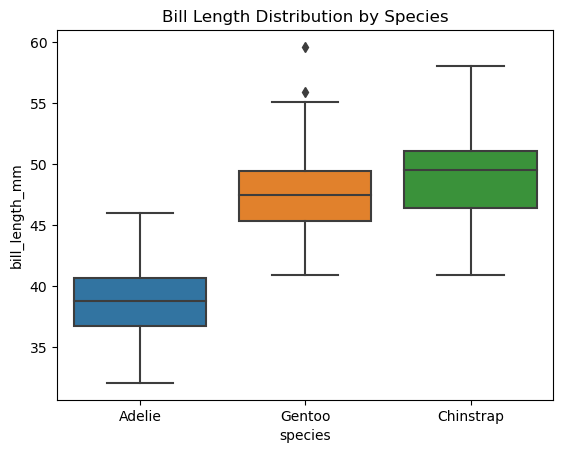

In [8]:
# Visualize distributions
sns.boxplot(data=data, x='species', y='bill_length_mm')
plt.title("Bill Length Distribution by Species")
plt.show()

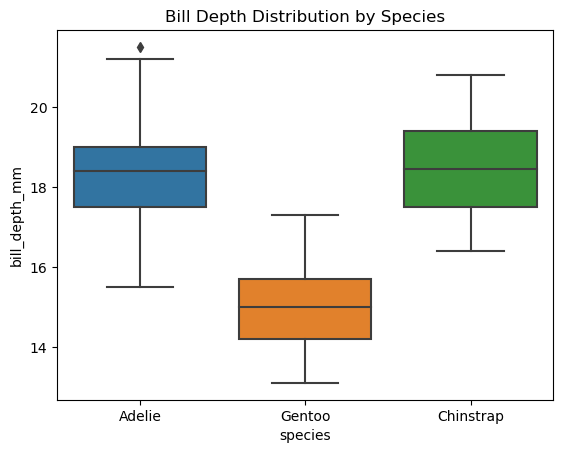

In [9]:
sns.boxplot(data=data, x='species', y='bill_depth_mm')
plt.title("Bill Depth Distribution by Species")
plt.show()

In [10]:
# Q4: Identify Outliers and Visualize
def detect_outliers(feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]



Outliers in bill_length_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


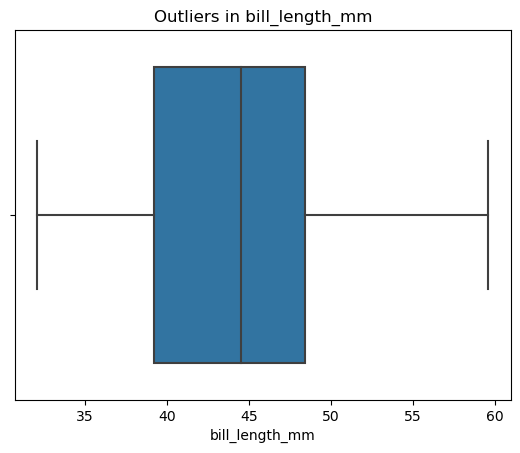


Outliers in bill_depth_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


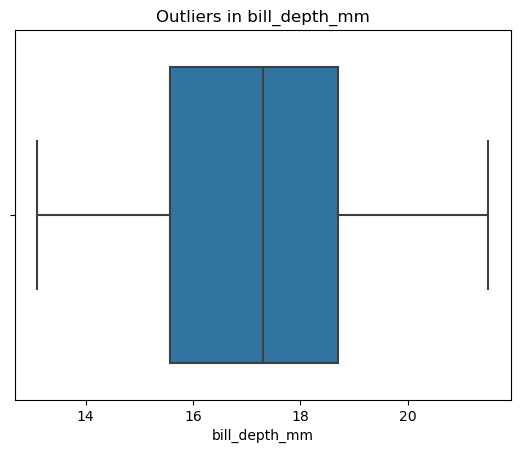


Outliers in flipper_length_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


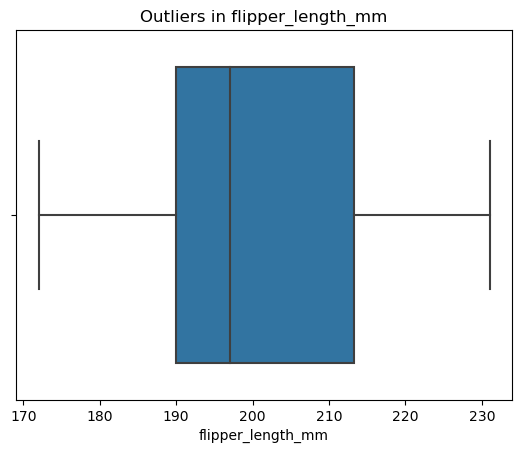


Outliers in body_mass_g:
        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
73      Adelie  Torgersen            45.8           18.9              197.0   
206     Gentoo     Biscoe            46.5           14.4              217.0   
324  Chinstrap      Dream            51.5           18.7              187.0   

     body_mass_g     sex  
73       15000.0    male  
206      12000.0  female  
324      10000.0    male  


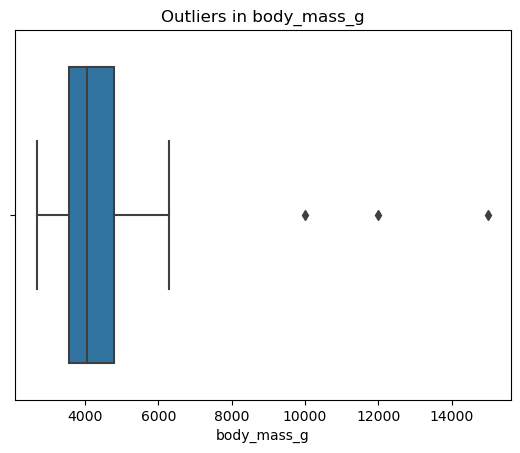

In [11]:
# Visualize outliers
for feature in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    outliers = detect_outliers(feature)
    print(f"\nOutliers in {feature}:\n", outliers)
    sns.boxplot(x=data[feature])
    plt.title(f"Outliers in {feature}")
    plt.show()


Explained Variance Ratio by PCA: [0.61950928 0.19550786]


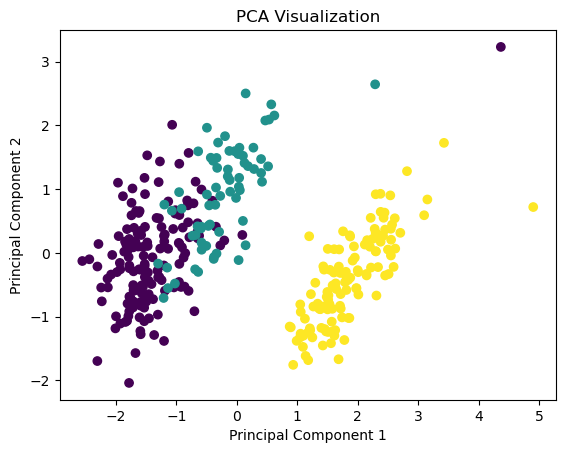

In [12]:
# Q5: Curse of Dimensionality and PCA
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nExplained Variance Ratio by PCA:", pca.explained_variance_ratio_)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['species'].astype('category').cat.codes, cmap='viridis')
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

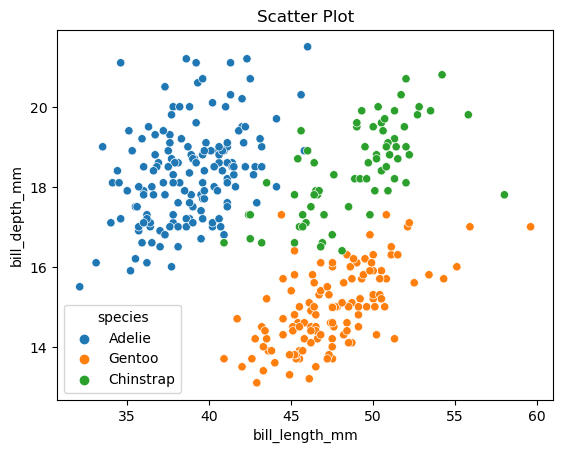

In [13]:
# Q6: Visualizations for bill_length_mm vs bill_depth_mm
sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title("Scatter Plot")
plt.show()

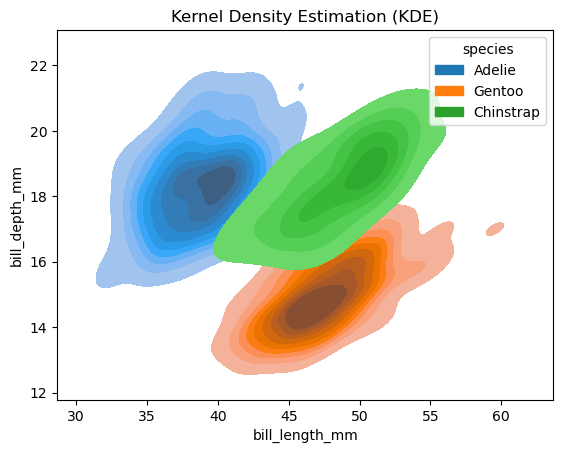

In [14]:
sns.kdeplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', fill=True)
plt.title("Kernel Density Estimation (KDE)")
plt.show()

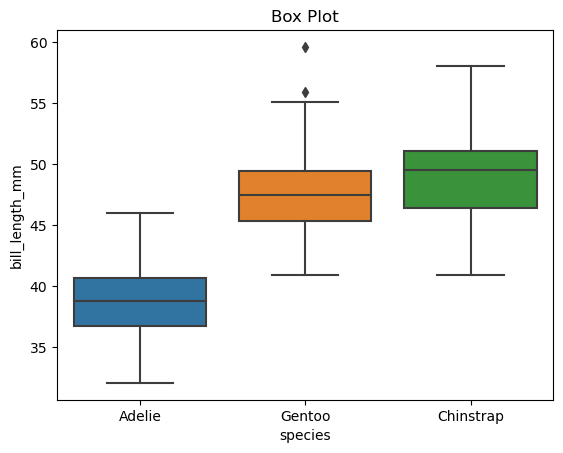

In [15]:
sns.boxplot(data=data, x='species', y='bill_length_mm')
plt.title("Box Plot")
plt.show()

In [18]:
# Q7: Maximum flipper_length_mm for Each Species and Island
max_flippers = data.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
print("\nMaximum flipper_length_mm by species and island:\n", max_flippers)



Maximum flipper_length_mm by species and island:
      species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0


In [19]:
# Q8: Perform Z-Score Normalization
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    data[col + '_zscore'] = zscore(data[col])

print("\nDataset after Z-Score Normalization:\n", data.head())


Dataset after Z-Score Normalization:
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       39.100000      18.700000         181.000000   
1  Adelie  Torgersen       39.500000      17.400000         186.000000   
2  Adelie  Torgersen       40.300000      18.000000         195.000000   
3  Adelie  Torgersen       38.791391      18.346358         189.953642   
4  Adelie  Torgersen       36.700000      19.300000         193.000000   

   body_mass_g      sex  bill_length_mm_zscore  bill_depth_mm_zscore  \
0  3750.000000     male              -0.886862              0.787370   
1  3800.000000   female              -0.813408              0.127702   
2  3250.000000   female              -0.666500              0.432164   
3  3772.516556  Unknown              -0.943533              0.607919   
4  3450.000000   female              -1.327585              1.091831   

   flipper_length_mm_zscore  body_mass_g_zscore  
0                 -1.419545      